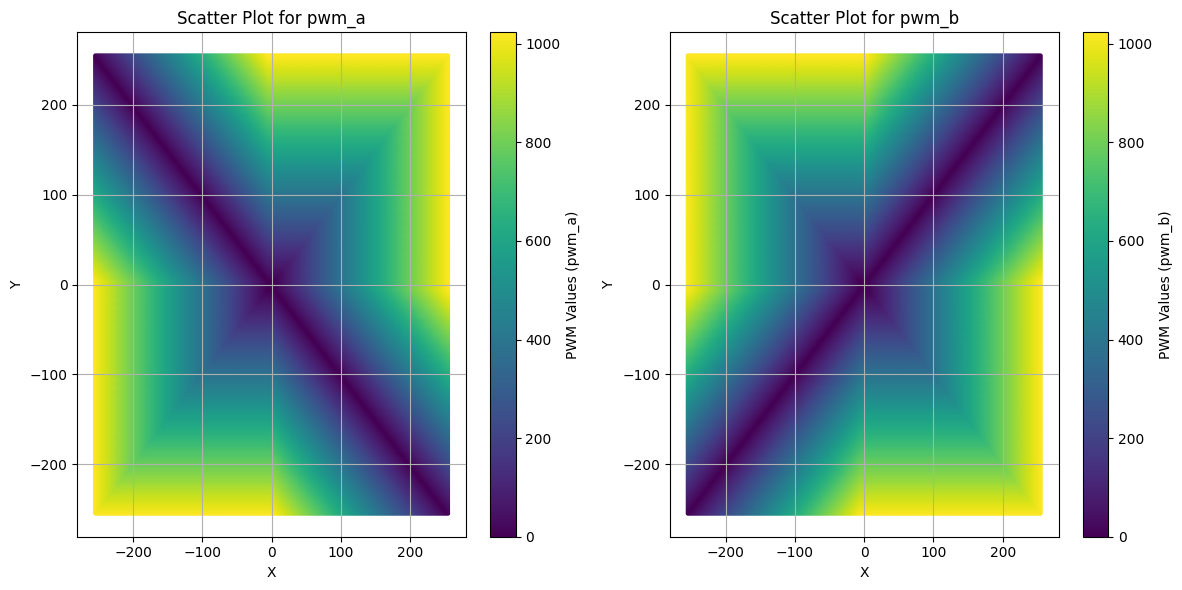

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def map_to_pwm(val, in_min, in_max, out_min, out_max):
    return int((val - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)

x_range = range(-255, 256)
y_range = range(-255, 256)

x_values, y_values = np.meshgrid(x_range, y_range)
pwm_values_a = np.zeros_like(x_values)
pwm_values_b = np.zeros_like(y_values)

for i in range(x_values.shape[0]):
    for j in range(x_values.shape[1]):
        x = x_values[i, j]
        y = y_values[i, j]

        if -5 <= x <= 5 and -5 <= y <= 5:
            pwm_value_a = 0  # Center
            pwm_value_b = 0
        elif -5 <= x <= 5 and 5 < y <= 255:
            pwm_value_a = map_to_pwm(y, 5, 255, 0, 1023)  # Forward
            pwm_value_b = map_to_pwm(y, 5, 255, 0, 1023)
        elif -5 <= x <= 5 and -255 <= y < -5:
            pwm_value_a = map_to_pwm(y, -5, -255, 0, 1023)  # Backward
            pwm_value_b = map_to_pwm(y, -5, -255, 0, 1023)
        elif 5 < x <= 255 and -5 <= y <= 5:
            pwm_value_a = map_to_pwm(x, 5, 255, 0, 1023)  # Right
            pwm_value_b = map_to_pwm(x, 5, 255, 0, 1023)
        elif -255 <= x < -5 and -5 <= y <= 5:
            pwm_value_a = map_to_pwm(x, -255, -5, 1023, 0)  # Left
            pwm_value_b = map_to_pwm(x, -255, -5, 1023, 0)
        elif 5 < x <= 255 and 5 < y <= 255:  # Top right
            if x > y:
                a_map = map_to_pwm(y, 5, 255, 0, 1023)
                pwm_value_a = map_to_pwm(x, y, 255, a_map, 1023)
                b_map = map_to_pwm(y, 5, 255, 1023, 0)
                pwm_value_b = map_to_pwm(x, y, 255, 0, b_map)
            else:
                pwm_value_a = map_to_pwm(y, 5, 255, 0, 1023)
                b_map = map_to_pwm(y, 5, 255, 0, 1023)
                pwm_value_b = map_to_pwm(x, 5, y, b_map, 0)
        elif -255 <= x < -5 and 5 < y <= 255:  # Top left
            if -x > y:
                a_map1 = map_to_pwm(y, 5, 255, 1023, 0)
                pwm_value_a = map_to_pwm(x, -255, -y, a_map1, 0)
                b_map1 = map_to_pwm(y, 5, 255, 0, 1023)
                pwm_value_b = map_to_pwm(x, -255, -y, 1023, b_map1)
            else:
                a_map1 = map_to_pwm(y, 5, 255, 0, 1023)
                pwm_value_a = map_to_pwm(x, -y, -5, 0, a_map1)
                pwm_value_b = map_to_pwm(y, 5, 255, 0, 1023)
        elif 5 < x <= 255 and -255 <= y < -5:  # Bottom right
            if x > -y:
                a_map2 = map_to_pwm(y, -5, -255, 1023, 0)
                pwm_value_a = map_to_pwm(x, -y, 255, 0, a_map2)
                b_map2 = map_to_pwm(y, -5, -255, 0, 1023)
                pwm_value_b = map_to_pwm(x, -y, 255, b_map2, 1023)
            else:
                pwm_value_b = map_to_pwm(y, -5, -255, 0, 1023)
                a_map2 = map_to_pwm(y, -5, -255, 0, 1023)
                pwm_value_a = map_to_pwm(x, -y, 5, 0, a_map2)
        elif -255 <= x < -5 and -255 <= y < -5:  # Bottom left
            if x < y:
                a_map3 = map_to_pwm(y, -5, -255, 0, 1023)
                pwm_value_a = map_to_pwm(x, y, -255, a_map3, 1023)
                b_map3 = map_to_pwm(y, -5, -255, 1023, 0)
                pwm_value_b = map_to_pwm(x, y, -255, 0, b_map3)
            else:
                b_map3 = map_to_pwm(y, -5, -255, 0, 1023)
                pwm_value_b = map_to_pwm(x, -5, y, b_map3, 0)
                pwm_value_a = map_to_pwm(y, -5, -255, 0, 1023)
        # else:
        #     pwm_value_a = 1023
        #     pwm_value_b = 1023
            

        pwm_values_a[i, j] = pwm_value_a
        pwm_values_b[i, j] = pwm_value_b

# Flatten arrays for scatter plot
x_flat = x_values.flatten()
y_flat = y_values.flatten()
pwm_a_flat = pwm_values_a.flatten()
pwm_b_flat = pwm_values_b.flatten()

plt.figure(figsize=(12, 6))

# Scatter plot for pwm_a
plt.subplot(1, 2, 1)
plt.scatter(x_flat, y_flat, c=pwm_a_flat, cmap='viridis', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot for pwm_a')
plt.colorbar(label='PWM Values (pwm_a)')
plt.grid(True)

# Scatter plot for pwm_b
plt.subplot(1, 2, 2)
plt.scatter(x_flat, y_flat, c=pwm_b_flat, cmap='viridis', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot for pwm_b')
plt.colorbar(label='PWM Values (pwm_b)')
plt.grid(True)

plt.tight_layout()
plt.show()